In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
from datetime import datetime
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Connect to db
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Reflect tables into classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['meas', 'sta']

In [4]:
# Save references to classes
Stations = Base.classes.sta
Measurements = Base.classes.meas

In [5]:
# Create db session object
session = Session(engine)

## Precipitation Analysis

In [6]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values

last12 = datetime.strptime("8/23/2016", "%m/%d/%Y")

precip_query = (session.query(Measurements.date, Measurements.prcp).
          filter(Measurements.date > last12))

In [7]:
# Load the query results into a Pandas DataFrame and set the index to the date column.

dates = []
precips = []

for row in precip_query:
    dates.append(row[0])
    precips.append(row[1])

precip_df = pd.DataFrame({"Date": dates,
                          "Precipitation": precips}).set_index("Date")

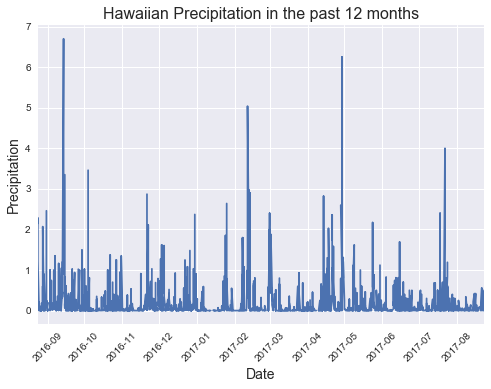

In [8]:
#Plot the results using the DataFrame plot method.

plt.clf()
precip_df.plot(legend = False)
plt.ylabel("Precipitation", size = 14)
plt.xlabel("Date", size = 14)
plt.title("Hawaiian Precipitation in the past 12 months",
         size = 16)
plt.xticks(rotation = 45)
plt.show()

In [9]:
# Use Pandas to print the summary statistics for the precipitation data.
 
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [10]:
# Design a query to calculate the total number of stations.

tot_sta = (session.query(func.count(Stations.name)).scalar())
print(f"Total number of stations: {tot_sta}")

Total number of stations: 9


In [11]:
# Design a query to find the most active stations.

# List the stations and observation counts in descending order
active_sta = (session.query(Measurements.station, func.count(Measurements.tobs))
              .group_by(Measurements.station)
              .order_by(func.count(Measurements.tobs).desc()))

# Which station has the highest number of observations?
print(f"The most active station is {active_sta[0][0]} with {active_sta[0][1]} temperature observations.")

The most active station is USC00519281 with 2772 temperature observations.


In [12]:
# Design a query to retrieve the last 12 months of temperature observation data 

last12_temp = (session.query(Measurements.tobs)
               .filter(Measurements.date > last12)
               .filter(Measurements.station == active_sta[0][0]))

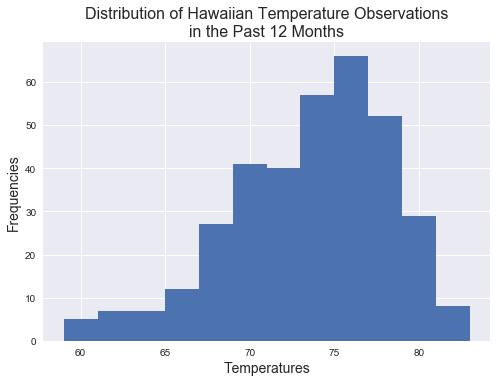

In [13]:
# Plot the results as a histogram with bins=12.

temps = []
for row in last12_temp:
    temps.append(row[0])
    
plt.clf()
plt.hist(temps, bins = 12)
plt.xlabel("Temperatures", size = 14)
plt.ylabel("Frequencies", size = 14)
plt.title("Distribution of Hawaiian Temperature Observations\nin the Past 12 Months", size = 16)
plt.show()

## Temperature Analysis

In [18]:
#Write a function called calc_temps that will accept a
# start date and end date in the format %Y-%m-%d and return
# the minimum, average, and maximum temperatures for that range of dates.

def calc_temps():
    start = datetime.strptime(input("Start date (YYYY-m-d): "), "%Y-%m-%d")
    end = datetime.strptime(input("End date (YYYY-m-d): "), "%Y-%m-%d")
    
    temps = []
    
    temp_query = (session.query(Measurements.tobs)
    .filter(Measurements.date >= start)
    .filter(Measurements.date <= end))

    for row in temp_query:
        temps.append(row[0])
    
    min_temp = min(temps)
    avg_temp = round(sum(temps)/len(temps),1)
    max_temp = max(temps)
    
    err = (max_temp-min_temp)/2
    
    print(f"""
    Min: {min_temp}
    Avg: {avg_temp}
    Max: {max_temp}
    """)
    
    plt.clf()
    plt.bar(1, avg_temp, yerr = err, color = "orange")
    plt.ylabel("Temp (F)", size = 16)
    plt.title("Trip Avg Temp", size = 20)
    plt.ylim(0,101)
    plt.tick_params(axis = "x", bottom = "off", labelbottom = "off")
    plt.figure(figsize=(3,4))
    plt.show()

Start date (YYYY-m-d): 2016-12-21
End date (YYYY-m-d): 2017-1-24

    Min: 60.0
    Avg: 70.4
    Max: 81.0
    


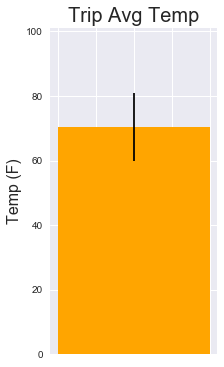

In [19]:
calc_temps()